**Avocado dataset link** :- https://github.com/insaid2018/Term-2/blob/master/Projects/avocado.csv

## Problem Statement
To explore **Avocado dataset** and find the insights regarding the __Average price__ with respect to different years, Volume produced,Type and Region.

### To perform analysis on:
- Average price being different every year from 2015 to 2018.
- Average price according to different region.
- Average price of different types of avocado in different years.

### To determine:
- Correlation between different variables.
- To see the difference between behevior of train and test data.
- To perform different machine learning operation on the data.

#### Description of Dataset:
The dataset contains 12 columns of Date, Average price,Total volume, Total number of types of avocado sold(4046,4225,4770), Bags and there types, Types of avocado, Year, Region.

## Table of content
1. [Importing packages](#section1)<br/>
2. [Importing Avocado Dataset](#section2)<br/>
3. [Pre-processing of dataset](#section3)<br/>
4. [Post-profiling of dataset](#section4)<br/>
5. [Exploratory Data analysis](#section5)
 - 5.1. [Average price](#section501)<br>
 - 5.2. [Box-plot of types and average price](#section502)<br>
 - 5.3. [Average price according to region](#section503)<br>
 - 5.4. [Average price in Albany region](#section504)<br>
 - 5.5. [Average price according to date](#section505)<br>
 - 5.6. [Average price in different region with type](#section506)<br>
    - 5.6.1 [Average price in different region organic type](#section50601)<br>
    - 5.6.2 [Average price in different region conventional type](#section50602)<br>
 - 5.7. [Pairplot](#section507)<br>
 - 5.8. [Heatmap](#section508)<br>
6. [Performing different machine learning algorithms](#section6)<br/>
 - 6.1. [Linear regression](#section601)<br>
 - 6.2. [Decision tree regressor](#section602)<br>
 - 6.3. [Random Forest regressor](#section603)<br>
7. [Conclusion](#section7)<br/>
8. [Actionable insights](#section8)<br/>

<a id=section1></a>
### 1. Importing packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

<a id=section2></a>
### 2. Importing Avocado dataset

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<a id=section3></a>
### 3. Pre- processing of dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
import pandas_profiling 
profile = df.profile_report(title = "Avocado Dataset")
profile.to_file(output_file = "avocadodataset.html")

<a id=section4></a>
### 4. Post-profiling of dataset

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [18]:
df.shape

(18249, 13)

In [19]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [20]:
duplicates = df[df.duplicated(keep = 'first')]
print('There are {} duplicates out of total {} rows.'.format(duplicates.shape[0], df.shape[0]))

There are 0 duplicates out of total 18249 rows.


In [21]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<a id=section5></a>
### 5. Exploratory Data analysis

<a id=section501></a>
**5.1 Average price**

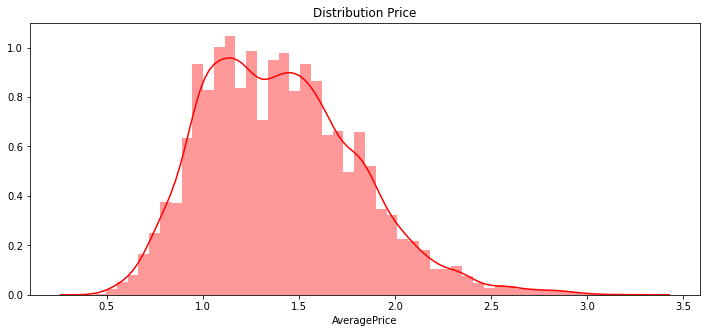

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"], color = 'r')

<a id=section502></a>
**5.2 Box-plot of types and average price**

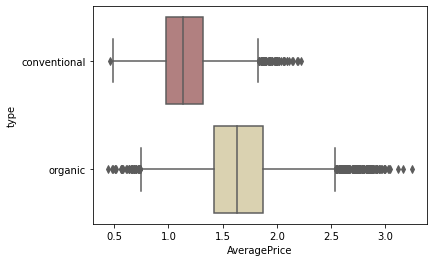

In [23]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'pink')

<a id=section503></a>
**5.3 Average price according to region**

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

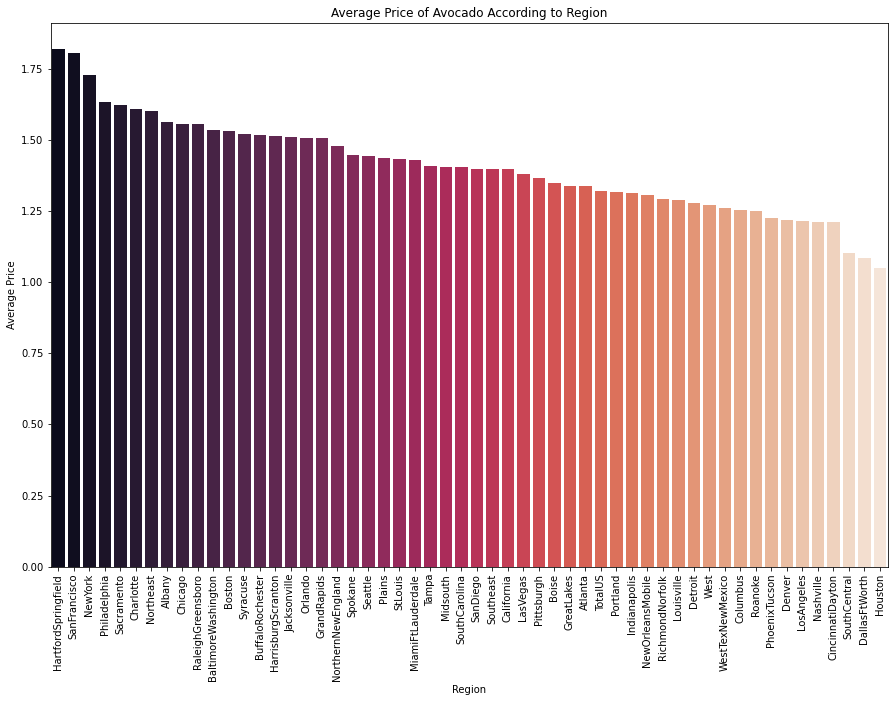

In [25]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price,palette='rocket')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

<a id=section504></a>
**5.4 Average price in Albany region** 

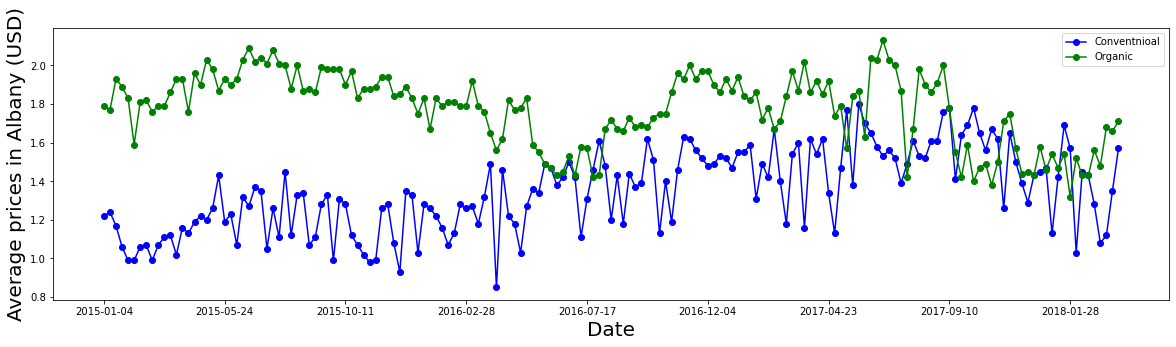

In [26]:
df['Date'] = df['Date'].astype('Datetime64')
avocado_albany_c = df.loc[(df['region'] == 'Albany') & (df['type'] == 'conventional')].sort_values(by = 'Date')
avocado_albany_o = df.loc[(df['region'] == 'Albany') & (df['type'] == 'organic')].sort_values(by = 'Date')
#fig,ax = plt.subplots()
plt.figure(figsize = (20,5))
plt.plot(avocado_albany_c.loc[df['type'] == 'conventional']["Date"],avocado_albany_c['AveragePrice'],'bo-',label = 'Conventnioal')
plt.plot(avocado_albany_o.loc[df['type'] == 'organic']["Date"],avocado_albany_o['AveragePrice'],'go-',label = 'Organic')
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Average prices in Albany (USD)',fontsize = 20)
plt.xticks(avocado_albany_c['Date'][::20])
plt.legend()
plt.show()

In [27]:
grouped_type = df.groupby('type')
grouped_type.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany


In [28]:
grouped_type.mean()['AveragePrice']

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

<a id=section505></a>
**5.5 Average price according to date**

Text(0.5, 1.0, 'Average Price')

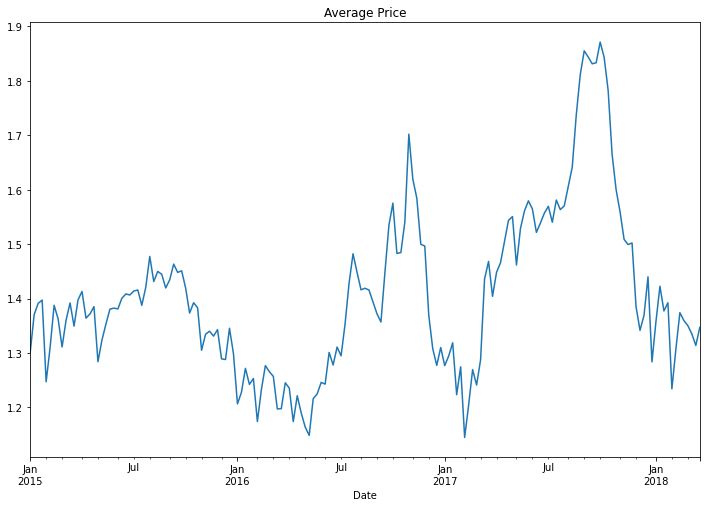

In [29]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

<a id=section506></a>
**5.6 Average price in different region**

<a id=section50601></a>
**5.6.1 Average price in different region organic type**

C:\Users\aniket\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


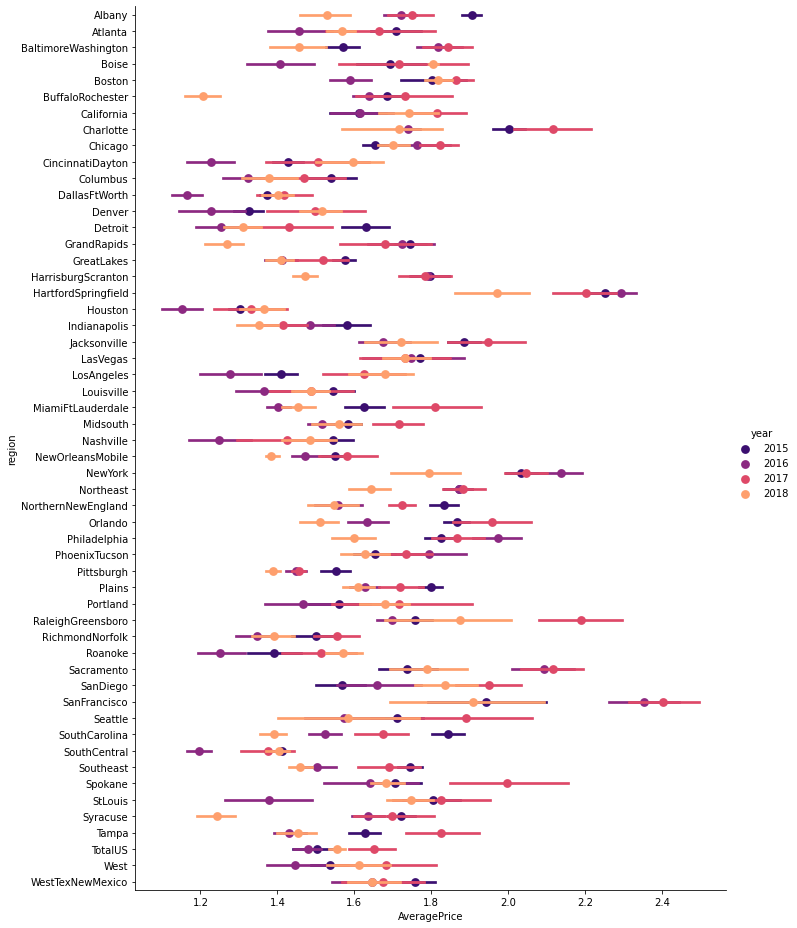

In [10]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   height=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

<a id=section50602></a>
**5.6.2 Average price in different region conventional type**

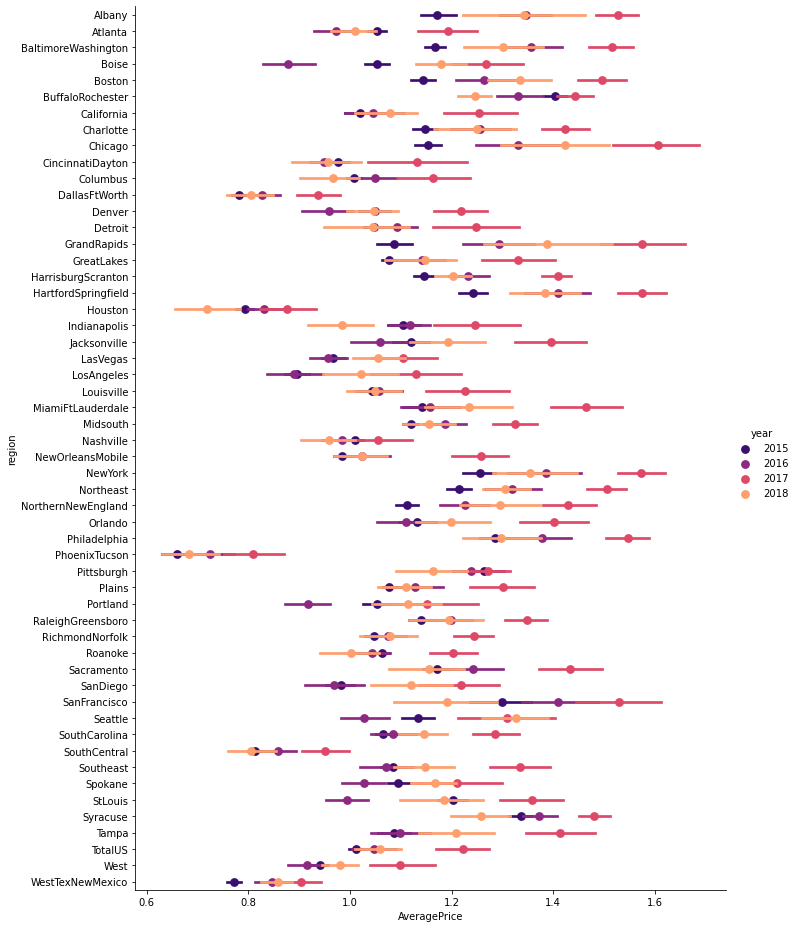

In [31]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   height=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

<a id=section507></a>
**5.7 Pairplot**

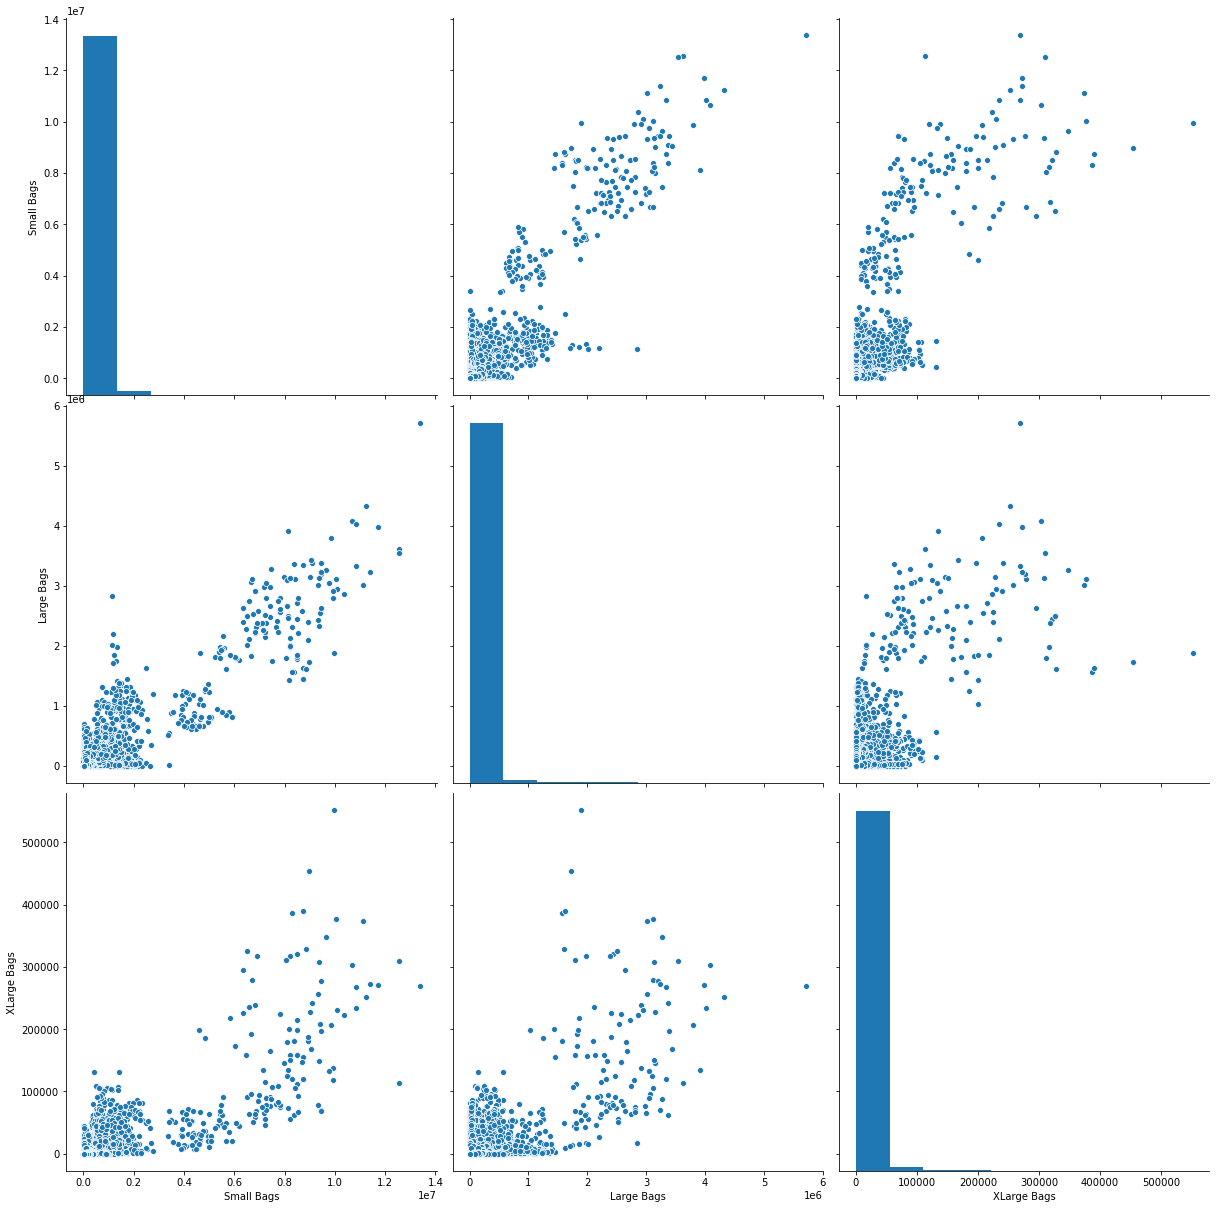

In [9]:
sns.pairplot(df.iloc[:,8:11], palette="husl",height=5.5)

In [32]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<a id=section508></a>
**5.8 Heatmap**

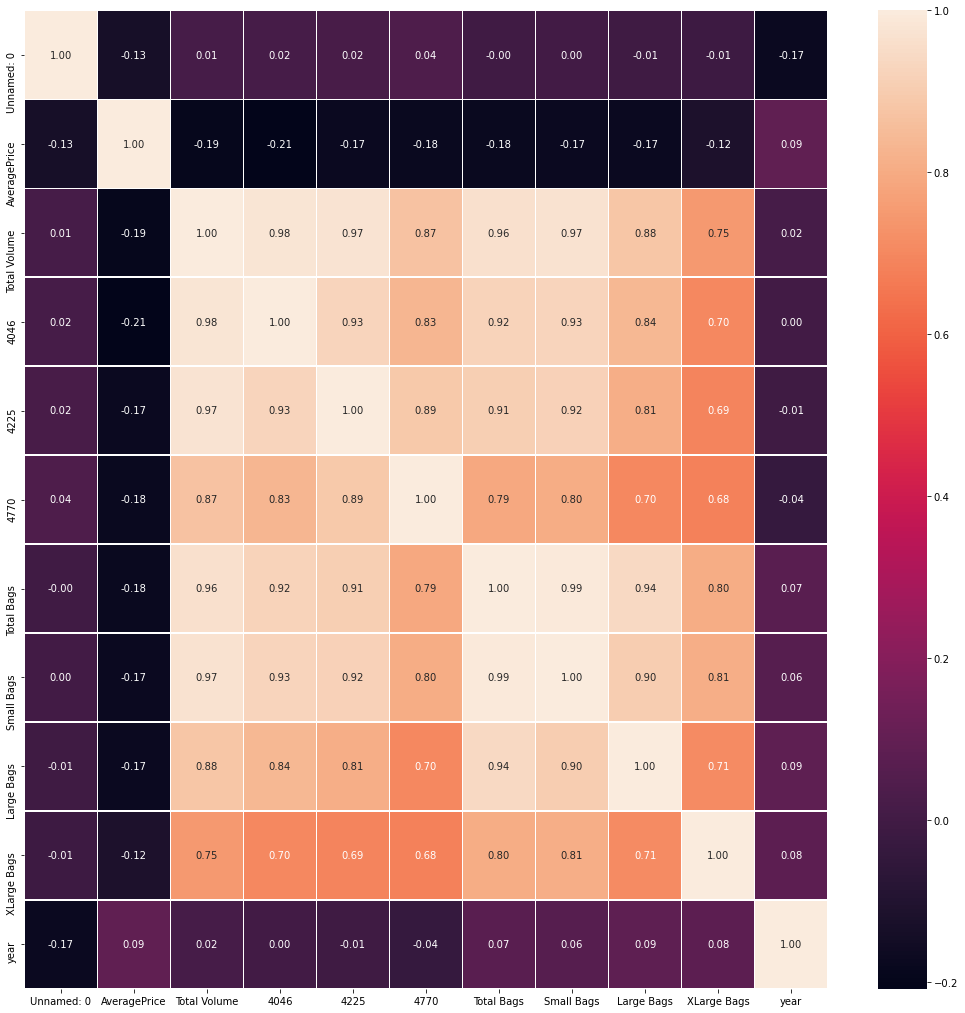

In [11]:
f,axis = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=axis)
plt.show()

In [34]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

- From the above heat map we can see some strong correlation between **Year** and **Average price** so we are taking these 2 variables for performing model. As the data is continous we can perform **Linear regression, Decision tree regressor** and **Random forest regressor**

<a id=section6></a>
### 6. Performing different machine learning algorithms

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

<a id=section601></a>
#### 6.1 Linear regression

In [6]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [8]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.24097655032702334
MSE: 0.09760990350811086
RMSE: 0.312425836812692


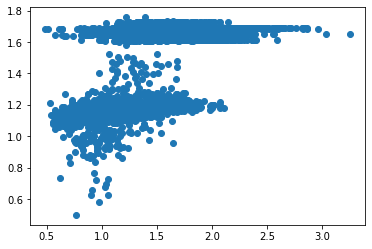

In [9]:
plt.scatter(x=y_test,y=pred)

<a id=section602></a>
#### 6.2 Decision tree regressor

In [10]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

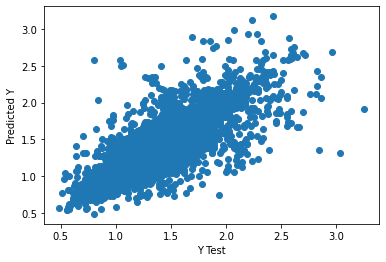

In [11]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.15952602739726027
MSE: 0.06144260273972602
RMSE: 0.24787618429313862


<a id=section603></a>
#### 6.3 Random Forest regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12191947945205481
MSE: 0.030947462731506847
RMSE: 0.1759189095336452


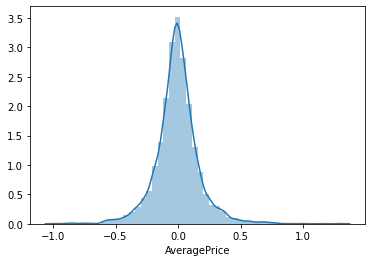

In [15]:
sns.distplot((y_test-pred),bins=50)

<a id=section7></a>
### 7. Conclusion

- When we compare our data with three algorithms we see that by using Random forest regressor we get less Root mean square error(RMSE) as compared to other algorithms.
- Also our residuals are normally distributed and that's really a good sign which means that our model was a correct choice for the data.
- Average price, total bags and total volume is well normally distributed data among all other column.
- There are no outliers in the data set after replacing it through mean value.
- As year is most negative co related column among all columns.
- In between August to October the price of avocado is much higher as compared to other months.
- Hartford Springfield, San Francisco and New York are having more average price as compared to another region.
- As organic type of avocado is having the more price per unit then conventional.

<a id=section8></a>
### 8. Actionable insights

- We can also compare model using classification algorithm by grouping date and total volume. It can give us different insight about the dataset.
- By using classification algorithm we can find out confusion matrix, accuracy score, precision and recall.